<a href="https://colab.research.google.com/github/shinho0902/BERT-GPT-/blob/main/2%EC%9E%A5_%EB%AC%B8%EC%9E%A5%EC%9D%84_%EC%9E%91%EC%9D%80_%EB%8B%A8%EC%9C%84%EB%A1%9C_%EC%AA%BC%EA%B0%9C%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-1 토큰화란?

문장을 토큰 시퀀스로 나누는 과정

- 단어 단위 토큰화: 
    - 어휘 집합의 크기가 커져 모델 학습이 어렵다.
- 문자 단위 토큰화: 
    - 미등록 토큰 문제로부터 자유롭다
    - 각 문자 토큰이 의미 있는 단위가 되기 어렵다.
- 서브워드 단위 토큰화:
    - 단어와 문자 단위 토큰화의 장점만 취한 형태
    - 어휘 집합 크기가 커지지 않으면서도 미등록 토큰 문제를 피하고, 분석된 토큰 시퀀스가 너무 길어지지 않게 한다.

# 2-2 바이트 페어 인코딩(BEP)이란?

BEP는 사전의 크기 증가를 억제하면서도 정보를 효율적으로 압축할 수 있는 알고리즘이다.

BPE 어휘 집합은 고빈도 바이그램(Bigram) 쌍을 병합하는 방식으로 구축된다.

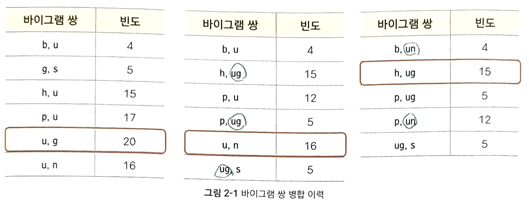

# 2-3 어휘 집합 구축하기

In [ ]:
!pip install ratsnlp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 네이버 영화 리뷰 NSMC
from Korpora import Korpora
nsmc = Korpora.load("nsmc", force_download=True)


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/



[nsmc] download ratings_train.txt: 14.6MB [00:00, 92.5MB/s]                            
[nsmc] download ratings_test.txt: 4.90MB [00:00, 17.2MB/s]                            


NSMC에 포함된 영화 리뷰들을 순수 텍스트 형태로 코랩 환경 로컬의 지정된 디렉터리에 저장해 둡니다.

In [ ]:
import os
def write_lines(path, lines):
    with open(path, 'w', encoding='utf-8') as f:
        for line in lines:
            f.write(f'{line}\n')
write_lines('/content/train.txt', nsmc.train.get_all_texts())
write_lines('/content/test.txt', nsmc.test.get_all_texts())

GPT 토크나이저 구축 - BPE

In [ ]:
# 디렉토리 만들기
import os
os.makedirs('/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/bbpe', exist_ok=True)

In [ ]:
# 바이트 수준 BPE 어휘 집합 구축
from tokenizers import ByteLevelBPETokenizer
bytebpe_tokenizer = ByteLevelBPETokenizer()
bytebpe_tokenizer.train(
    files=['/content/train.txt', '/content/test.txt'], # 학습 말뭉치를 리스트 형태로 넣기
    vocab_size = 1000, # 어휘 집합 크기 조절
    special_tokens=['[PAD]'], # 특수 토큰 추가
)
bytebpe_tokenizer.save_model('/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/bbpe')

['/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/bbpe/vocab.json',
 '/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/bbpe/merges.txt']

In [ ]:
import json
with open('/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/bbpe/vocab.json', 'r') as f:
    json_data = json.load(f)
print(json.dumps(json_data) )

{"[PAD]": 0, "!": 1, "\"": 2, "#": 3, "$": 4, "%": 5, "&": 6, "'": 7, "(": 8, ")": 9, "*": 10, "+": 11, ",": 12, "-": 13, ".": 14, "/": 15, "0": 16, "1": 17, "2": 18, "3": 19, "4": 20, "5": 21, "6": 22, "7": 23, "8": 24, "9": 25, ":": 26, ";": 27, "<": 28, "=": 29, ">": 30, "?": 31, "@": 32, "A": 33, "B": 34, "C": 35, "D": 36, "E": 37, "F": 38, "G": 39, "H": 40, "I": 41, "J": 42, "K": 43, "L": 44, "M": 45, "N": 46, "O": 47, "P": 48, "Q": 49, "R": 50, "S": 51, "T": 52, "U": 53, "V": 54, "W": 55, "X": 56, "Y": 57, "Z": 58, "[": 59, "\\": 60, "]": 61, "^": 62, "_": 63, "`": 64, "a": 65, "b": 66, "c": 67, "d": 68, "e": 69, "f": 70, "g": 71, "h": 72, "i": 73, "j": 74, "k": 75, "l": 76, "m": 77, "n": 78, "o": 79, "p": 80, "q": 81, "r": 82, "s": 83, "t": 84, "u": 85, "v": 86, "w": 87, "x": 88, "y": 89, "z": 90, "{": 91, "|": 92, "}": 93, "~": 94, "\u00a1": 95, "\u00a2": 96, "\u00a3": 97, "\u00a4": 98, "\u00a5": 99, "\u00a6": 100, "\u00a7": 101, "\u00a8": 102, "\u00a9": 103, "\u00aa": 104, "\u

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/bbpe/merges.txt", 'r') as f:
    print(f.read(100))    

#version: 0.2 - Trained by `huggingface/tokenizers`
Ġ ì
Ġ ë
ì Ŀ
ë ĭ
í ķ
ê °
. .
ìĿ ´
ëĭ ¤
ë Ĭ
ì Ĺ
ê 


BERT 토크나이저 구축 - WordPiece

In [ ]:
import os
os.makedirs('/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/wordpiece', exist_ok=True)

In [ ]:
# 워드피스 어휘 집합 구축
from tokenizers import BertWordPieceTokenizer
wordpiece_tokenizer = BertWordPieceTokenizer(lowercase=False)
wordpiece_tokenizer.train(
    files=['/content/train.txt', '/content/test.txt'],
    vocab_size=10000,
)
wordpiece_tokenizer.save_model('/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/wordpiece')

['/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/wordpiece/vocab.txt']

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/wordpiece/vocab.txt", 'r') as f:
    print(f.read(1000))

[PAD]
[UNK]
[CLS]
[SEP]
[MASK]
!
"
%
&
'
(
)
*
+
,
-
.
/
0
1
2
3
4
5
6
7
8
9
:
;
<
=
>
?
@
A
B
C
D
E
F
G
I
K
L
M
N
O
P
R
S
T
V
X
[
]
^
_
`
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
r
s
t
u
v
w
x
y
z
~
★
♡
♥
ㄱ
ㄴ
ㄷ
ㄹ
ㅁ
ㅂ
ㅅ
ㅇ
ㅈ
ㅉ
ㅋ
ㅎ
ㅏ
ㅗ
ㅜ
ㅠ
ㅡ
ㅣ
가
각
간
갈
감
갑
값
갓
갔
강
갖
같
개
객
갠
갱
걍
거
건
걸
검
겁
것
겉
게
겐
겟
겠
겨
격
견
결
겹
겼
경
계
고
곡
곤
골
곱
곳
공
과
관
광
괜
괴
굉
교
구
국
군
굳
굴
굿
궁
권
귀
규
균
그
극
근
글
금
급
기
긴
길
김
깊
까
깎
깐
깔
깜
깝
깨
꺼
껄
껏
께
껴
꼈
꼬
꼭
꼴
꼽
꽃
꽝
꽤
꾸
꾼
꿀
꿈
꿔
뀌
끄
끈
끊
끌
끔
끝
끼
낀
낄
낌
나
낙
낚
난
날
남
납
낫
났
낭
낮
낳
내
낸
낼
냄
냈
냉
냐
냥
너
넌
널
넘
넣
네
넷
녀
년
념
녕
노
녹
논
놀
놈
농
높
놓
놔
놨
뇌
누
눈
뉴
느
는
늘
늙
능
늦
니
닉
닌
닐
님
닙
닝
다
닥
단
닫
달
닮
담
답
당
닿
대
댄
댓
더
덕
던
덜
덤
덩
데
덴
뎁
도
독
돈
돋
돌
동
돼
됐
되
된
될
됨
됩
됬
두
둘
둥
뒤
뒷
드
득
든
듣
들
듬
듭
듯
등
디
딘
딧
딩
따
딱
딴
딸
땅
때
땐
땜
땡
떄
떠
떡
떤
떨
떻
떼
또
똑
똥
뚝
뚱
뛰
뜨
뜩
뜬
뜻
라
락
란
랄
람
랍
랐
랑
래
랙
랜
램
랫
랬
략
량
러
럭
런
럴
럼
럽
렁
렇
레
렉
렌
려
력
련
렬
렵
렷
렸
령
례
로
록
론
롭
롯
롱
뢰
료
룡
루
룬
류
륜
률
륭
르
른
를
름
리
릭
린
릴
림
립
릿
링
마
막
만
많
말
맘
맙
맛
망
맞
맡
매
맥
맨
맹
머
먹
먼
멀
멈
멋
멍
메
멘
멜
며
면
멸
명
몇
모
목
몬
몰
몸
못
몽
묘
무
묵
문
묻
물
뭉
뭐
뭔
뭘
뮤
므
미
믹
민
믿
밀
밋
밌
밑
바
박
밖
반
받
발
밝
밤
밥
방
배
백
뱀
버
번
벌
범
법

In [ ]:
MYPATH = '/content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/'

# 2-4 토큰화 하기

문장을 토큰화하고 해당 토큰을 모델의 입력으로 만드는 과정 실습

## GPT 모델 입력값 만들기

In [ ]:
# GPT 토크나이저 선언
from transformers import GPT2Tokenizer
tokenizer_gpt = GPT2Tokenizer.from_pretrained(MYPATH + 'nlpbook/bbpe')
tokenizer_gpt.pad_token = "[PAD]"

file /content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/bbpe/config.json not found


In [ ]:
sentences = [
    "아 더빙.. 진짜 짜증나네요 목소리",
    "흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나",
    "별루 였다..",
]

In [ ]:
# 토큰화 결과 볼때
tokenized_sentences = [tokenizer_gpt.tokenize(sentence) for sentence in sentences]
tokenized_sentences

[['ìķĦ',
  'ĠëįĶ',
  'ë¹',
  'Ļ',
  '..',
  'Ġì§Ħì§ľ',
  'Ġì§ľ',
  'ì¦Ŀ',
  'ëĤĺ',
  'ëĦ¤ìļĶ',
  'Ġëª',
  '©',
  'ìĨĮ',
  'ë¦¬'],
 ['íĿ',
  'ł',
  '...',
  'íı¬',
  'ìĬ¤',
  'íĦ°',
  'ë³´ê³ł',
  'Ġì´',
  'Īë',
  'Ķ',
  '©',
  'ìĺģíĻĶ',
  'ì¤Ħ',
  '....',
  'ìĺ¤',
  'ë²Ħ',
  'ìĹ°ê¸°',
  'ì¡°',
  'ì°¨',
  'Ġê°Ģ',
  'ë³',
  'į',
  'ì§Ģ',
  'ĠìķĬ',
  'êµ¬',
  'ëĤĺ'],
 ['ë³', 'Ħ', 'ë£¨', 'Ġìĺ', 'Ģ', 'ëĭ¤', '..']]

In [ ]:
# gpt 모델 입력 만들기 (실제 모델 입력값)
batch_inputs = tokenizer_gpt(
    sentences,
    padding="max_length", # 문장의 최대 길이에 맞춰 패딩
    max_length=12, # 문장의 토큰 기준 최대 길이
    truncation=True, # 문장 잘림 허용 옵션
)

In [ ]:
batch_inputs.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
# 토큰화 결과를 가지고 각 토큰을 인덱스로 바꾼 것
batch_inputs['input_ids']

[[334, 557, 662, 248, 263, 581, 995, 917, 315, 464, 361, 103],
 [791, 255, 336, 792, 368, 542, 758, 888, 302, 243, 103, 356],
 [412, 227, 530, 451, 223, 265, 263, 0, 0, 0, 0, 0]]

In [ ]:
# 일반 토큰(1), 패딩 토큰(0)
batch_inputs['attention_mask']

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]]

## BERT 모델 입력값 만들기

In [ ]:
# BERT 토크나이저 선언
from transformers import BertTokenizer
tokenizer_bert = BertTokenizer.from_pretrained(
    MYPATH + 'nlpbook/wordpiece',
    do_lower_case = False,
)

file /content/drive/MyDrive/Colab Notebooks/BERT와 GPT로 배우는 자연어처리/nlpbook/wordpiece/config.json not found


In [ ]:
sentences = [
    "아 더빙.. 진짜 짜증나네요 목소리",
    "흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나",
    "별루 였다..",
]

In [ ]:
# 토큰화 결과 볼때
tokenized_sentences = [tokenizer_bert.tokenize(sentence) for sentence in sentences]
tokenized_sentences

[['아', '더빙', '.', '.', '진짜', '짜증나', '##네요', '목소리'],
 ['흠',
  '.',
  '.',
  '.',
  '포스터',
  '##보고',
  '초딩',
  '##영화',
  '##줄',
  '.',
  '.',
  '.',
  '.',
  '오버',
  '##연기',
  '##조차',
  '가볍',
  '##지',
  '않',
  '##구나'],
 ['별루', '였다', '.', '.']]

In [ ]:
# BERT 모델 입력 만들기 (실제 모델 입력값)
batch_inputs = tokenizer_bert(
    sentences,
    padding="max_length",
    max_length=12,
    truncation=True,
)

In [ ]:
batch_inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
batch_inputs['input_ids']

[[2, 620, 2631, 16, 16, 1993, 3678, 1990, 3323, 3, 0, 0],
 [2, 997, 16, 16, 16, 2609, 2045, 2796, 1981, 1033, 16, 3],
 [2, 3274, 9508, 16, 16, 3, 0, 0, 0, 0, 0, 0]]

문장의 시작과 끝에 2개의 토큰을 덧붙이는 특징

2: [CLS]

3: [SEP]

In [ ]:
batch_inputs['attention_mask']

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]]

세그먼트(segment)

첫번째 세그먼트(문서 혹은 문장)은 0, 두번째 세그먼트는 1

여기선 한문장이니까 모두 0으로 처리됐음

In [ ]:
batch_inputs['token_type_ids']

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]